In [2]:
import os
os.chdir('../')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#from sklearn.metrics import mean_squared_error
from datamodel import Listing, Observation, Order, OrderDepth, ProsperityEncoder, Symbol, Trade, TradingState, ConversionObservation


data_1 = pd.read_csv('data/prices_round_2_day_-1.csv', sep =";")
data_2 = pd.read_csv('data/prices_round_2_day_0.csv', sep =";")
data_3 = pd.read_csv('data/prices_round_2_day_1.csv', sep =";")

data=[data_1, data_2, data_3]
data= pd.concat(data).reset_index(drop=True)
data.head()


,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
0,0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,-1
1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,-1
2,200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,-1
3,300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,-1
4,400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,-1


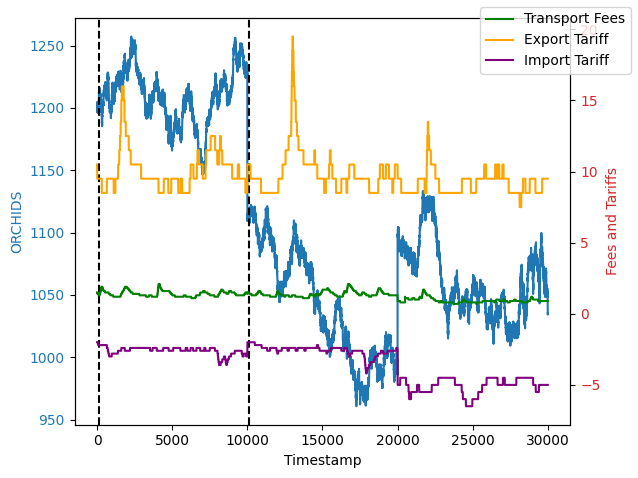

In [14]:
# Plotting
fig, ax1 = plt.subplots()

# Plotting ORCHIDS
color = 'tab:blue'
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('ORCHIDS', color=color)
ax1.plot(data['ORCHIDS'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating second y-axis for TRANSPORT_FEES, EXPORT_TARIFF, and IMPORT_TARIFF
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Fees and Tariffs', color=color)

# Plotting TRANSPORT_FEES, EXPORT_TARIFF, and IMPORT_TARIFF
ax2.plot(data['TRANSPORT_FEES'], color='green', label='Transport Fees')
ax2.plot(data['EXPORT_TARIFF'], color='orange', label='Export Tariff')
ax2.plot(data['IMPORT_TARIFF'], color='purple', label='Import Tariff')

ax2.tick_params(axis='y', labelcolor=color)

#add vertical line at 100
ax1.axvline(x=100, color='black', linestyle='--')
ax1.axvline(x=100 + 100*100, color='black', linestyle='--')


# Adding legend
fig.tight_layout()
fig.legend(loc='upper right')

plt.show()

In [8]:
# scale data['TRANSPORT_FEES'] from -1 to 1
scaled_TF = (data['TRANSPORT_FEES'] - data['TRANSPORT_FEES'].min()) / (data['TRANSPORT_FEES'].max() - data['TRANSPORT_FEES'].min()) * 2 - 1
scaled_ET = (data['EXPORT_TARIFF'] - data['EXPORT_TARIFF'].min()) / (data['EXPORT_TARIFF'].max() - data['EXPORT_TARIFF'].min()) * 2 - 1
scaled_IT = (data['IMPORT_TARIFF'] - data['IMPORT_TARIFF'].min()) / (data['IMPORT_TARIFF'].max() - data['IMPORT_TARIFF'].min()) * 2 - 1

In [11]:
cost = scaled_TF + scaled_IT + scaled_ET

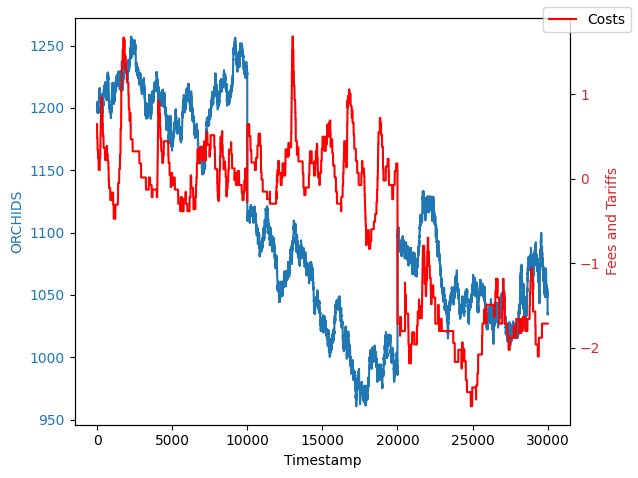

In [12]:
# Plotting
fig, ax1 = plt.subplots()

# Plotting ORCHIDS
color = 'tab:blue'
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('ORCHIDS', color=color)
ax1.plot(data['ORCHIDS'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating second y-axis for TRANSPORT_FEES, EXPORT_TARIFF, and IMPORT_TARIFF
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Fees and Tariffs', color=color)

# Plotting TRANSPORT_FEES, EXPORT_TARIFF, and IMPORT_TARIFF
ax2.plot(cost, color='red', label='Costs')


ax2.tick_params(axis='y', labelcolor=color)

# Adding legend
fig.tight_layout()
fig.legend(loc='upper right')

plt.show()